In [21]:
# import machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# import accuracy_score method
from sklearn.metrics import accuracy_score


# import data
from sklearn.model_selection import train_test_split
import pandas as pd

stacking_train_data = pd.read_csv("../data/train/train.csv")
df = pd.DataFrame(stacking_train_data)
x = df.drop(['Id', 'Pawpularity'], axis=1)
y = df['Pawpularity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = [('Logistic Regression',LogisticRegression()),
 ('Nearest Neighbors',KNeighborsClassifier()),
 ('Decision Tree',DecisionTreeClassifier()),
 ('Support Vector Classifier',SVC()),
 ('Naive Bayes',GaussianNB()),
 ('SVC Linear', SVC(kernel='linear'))]


In [22]:
accuracy_list = []
for model in models:
    model[1].fit(x_train, y_train)
    y_pred = model[1].predict(x_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))
print(accuracy_list)

[0.025214321734745335, 0.0226928895612708, 0.02723146747352496, 0.02924861321230459, 0.0, 0.02168431669188099]


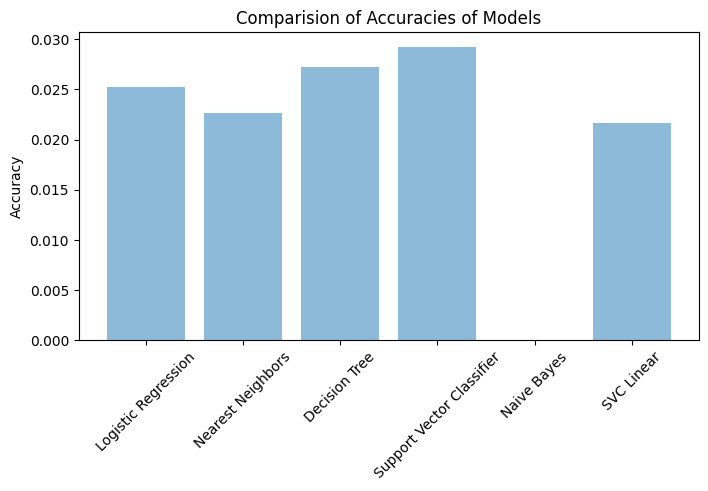

In [23]:
# import matplotlib for visualization
import matplotlib.pyplot as plt

# Bar chart of the accuracy of the models
plt.figure(figsize=(8, 4))
model_names = [x[0] for x in models]
y_pos = range(len(models))
plt.bar(y_pos, accuracy_list, align='center', alpha=0.5)
plt.xticks(y_pos, [x[0] for x in models], rotation=45)
plt.ylabel('Accuracy')
plt.title('Comparision of Accuracies of Models')
plt.show()

Pawpularity      1.000000
Accessory        0.018820
Group            0.017735
Face             0.012982
Collage          0.005485
Near             0.002247
Action           0.001883
Human            0.000895
Occlusion       -0.000956
Eyes            -0.001976
Info            -0.002306
Subject Focus   -0.006873
Blur            -0.020890
Name: Pawpularity, dtype: float64


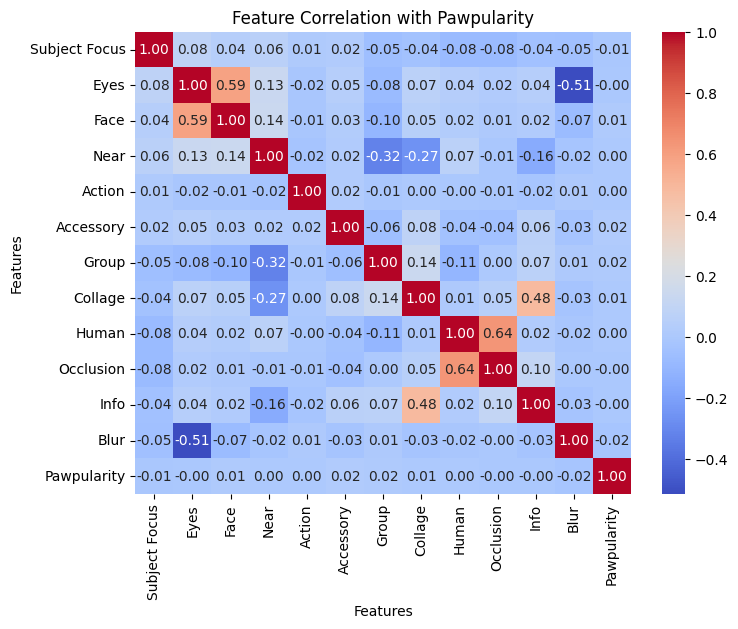

In [24]:
# Import seaborn to create a heatmap
import seaborn as sns

# heatmap of the correlation matrix
train_data_for_corr = x_train.copy()
train_data_for_corr['Pawpularity'] = y_train

correlation_matrix = train_data_for_corr.corr()

pawpularity_correlation = correlation_matrix['Pawpularity'].sort_values(ascending=False)
print(pawpularity_correlation)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation with Pawpularity')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [25]:
from sklearn.ensemble import StackingClassifier

# create stacking model
stacking_model = StackingClassifier(estimators=models, 
  final_estimator=LogisticRegression(), cv=5)

# fit the model on training data
stacking_model.fit(x_train, y_train)
y_pred = stacking_model.predict(x_test)

# calculate the accuracy of the model, with stacking
accuracy_score(y_test, y_pred)
accuracy_list.append(accuracy_score(y_test, y_pred))
model_names = [x[0] for x in models]
model_names.append("Stacked Model")

print(accuracy_list)

/Users/pentiam1pro/projects/UCL/Machine_learning/pawpularity/pawpularityVenv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/pentiam1pro/projects/UCL/Machine_learning/pawpularity/pawpularityVenv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/pentiam1pro/projects/UCL/Machine_learning/pawpularity/pawpularityVenv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/pentiam1pro/projects/UCL/Machine_learning/pawpularity/pawpularityVenv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n

[0.025214321734745335, 0.0226928895612708, 0.02723146747352496, 0.02924861321230459, 0.0, 0.02168431669188099, 0.030761472516389308]


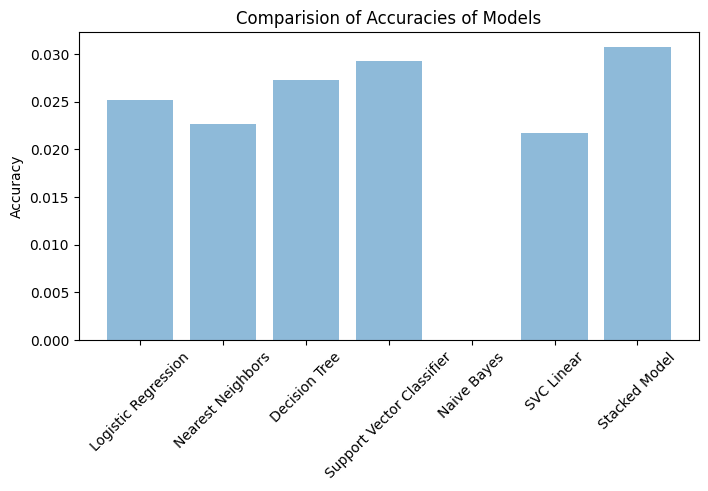

In [26]:
# Bar chart of the accuracy of the models, with stacking
plt.figure(figsize=(8, 4))
y_pos = range(len(model_names))
plt.bar(y_pos, accuracy_list, align='center', alpha=0.5)
plt.xticks(y_pos, model_names, rotation=45)
plt.ylabel('Accuracy')
plt.title('Comparision of Accuracies of Models')
plt.show()